## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


**Nome:** Luiz Felipe Souza de Oliveira **RM**- 94538

### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
#Seu Código aqui....
dados = pd.read_csv('aptos.csv', sep=',')

In [3]:
dados.head(10)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: É o tamanho ao todo do apartamento. 
-   Quartos: É o numero de quartos que este apartamento possui.
-   Vagas: Capacidade de carros permitidos na garagem.
-   Reformado: Se o apartamento ja passou por alguma reforma ou não.
-   Bairro: Localização do apartamento.

**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  ...___________ 
- Eu acho que quanto mais quartos maior vai ser o preço do apartamento.
2.  ...___________
- Eu acho que quanto maior o tamanho do imóvel maior vai ser o preço dele.


## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [4]:
#Seu Código aqui...
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     114 non-null    int64  
 1   valor      113 non-null    float64
 2   quartos    114 non-null    int64  
 3   vagas      114 non-null    int64  
 4   reformado  113 non-null    float64
 5   bairro     114 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB


In [5]:
#Seu Código aqui...
dados.describe()

,metros,valor,quartos,vagas,reformado
count,114.000000,113.000000,114.000000,114.000000,113.000000
mean,79.500000,401.539823,2.543860,1.675439,0.513274
std,27.516126,171.370059,0.582037,0.722528,0.502050
min,43.000000,188.000000,1.000000,0.000000,0.000000
25%,56.000000,255.000000,2.000000,1.000000,0.000000
50%,71.000000,347.000000,3.000000,2.000000,1.000000
75%,99.000000,515.000000,3.000000,2.000000,1.000000
max,199.000000,880.000000,4.000000,4.000000,1.000000


In [6]:
import plotly.express as px


<AxesSubplot:xlabel='quartos', ylabel='valor'>

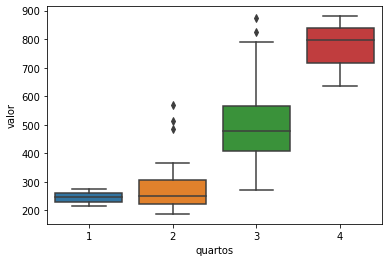

In [7]:
sns.boxplot(x='quartos', y='valor', data=dados)

Text(0.5, 1.0, '')

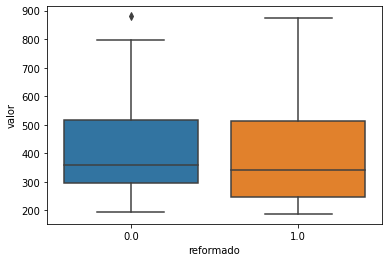

In [8]:
sns.boxplot(x='reformado', y='valor', data=dados)
plt.title('')

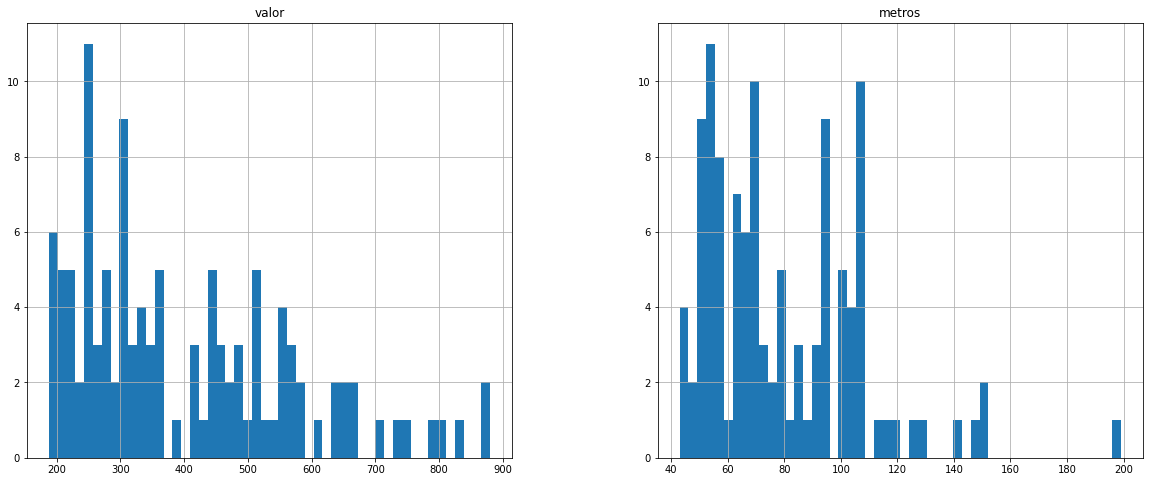

In [9]:
dados[['valor', 'metros',]].hist(figsize=(20,8), bins=50);

### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [x] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo regressão linear múltipla 
2. algoritimo random forest.

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo  de Regressão Linear Múltiplo ele irá "setar" diversas variáveis independentes. 
2. algoritimo Random Forest é composto por várias árvores de decisão que quando combinados os modelos terá um aumento no resultado final

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
valores = dados[['metros', 'valor', 'quartos', 'vagas', 'reformado']].dropna()

In [12]:
x = valores[['metros', 'quartos', 'vagas', 'reformado']]
y = valores['valor']

In [13]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=40)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

 Regressão Linear Múltiplo

In [14]:
#Seu Código aqui...
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelo = LinearRegression()

modelo.fit(x_treino,y_treino)

LinearRegression() 

LinearRegression()

In [15]:
predicao = modelo.predict(x_teste)

In [16]:
treino_squared = mean_squared_error(y_treino, modelo.predict(x_treino))
teste_squared = mean_squared_error(y_teste, modelo.predict(x_teste))
print(treino_squared)
print(teste_squared)

3873.154310222195
6555.924412074953


In [17]:
treino_absolute = mean_absolute_error(y_treino, modelo.predict(x_treino))
teste_absolute = mean_absolute_error(y_teste, modelo.predict(x_teste))
print(treino_absolute)
print(teste_absolute)

46.82055959463445
58.859159557478044


In [18]:
treino_score = r2_score(y_treino, modelo.predict(x_treino))
teste_score = r2_score(y_teste, modelo.predict(x_teste))
print(treino_score)
print(teste_score)

0.8573292367723077
0.7982617007953036


Random Forest

In [21]:
#Seu Código aqui...
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

random = RandomForestRegressor(random_state=42)
random.fit(x_treino, y_treino)


RandomForestRegressor(random_state=42)

In [22]:
y_predicoes = random.predict(x_teste)

In [23]:
random_train_absolute = mean_absolute_error(y_treino, random.predict(x_treino))
random_test_absolute = mean_absolute_error(y_teste, random.predict(x_teste))
print(random_train_absolute)
print(random_test_absolute)

29.67345329670329
55.65739472455648


In [24]:
random_train_squared = mean_squared_error(y_treino, random.predict(x_treino))
random_test_squared = mean_squared_error(y_teste, random.predict(x_teste))
print(random_train_squared)
print(random_test_squared)

1762.9250907610897
5127.555620702578


In [25]:
random_train_score = r2_score(y_treino, random.predict(x_treino))
random_test_score = r2_score(y_teste, random.predict(x_teste))
print(random_train_score)
print(random_test_score)

0.9350612322498185
0.8422153330363636


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | 0.85 | 0.93 |
| teste  | 0.79 | 0.84 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:**
O algoritmo que teve melhor desempenho foi o Forest Random, pois ele teve um melhor aprendizado com os treinos,comparado ao algoritmo de regressão linear múltiplo e também seus testes ficaram acima da regressão linear.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [26]:
#Seu Código aqui...
imovel = pd.DataFrame({
    'metros' : [72],
    'quartos' : [2],
    'vagas' : [2],
    'reformado' : [1]
})

In [27]:
valores = modelo.predict(imovel)[0]

In [28]:
print(valores)

369.6365481245001


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, pois ficou dentro dos valores que eu tinha pensado.

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Talvez ter usado outro algoritmo para fazer os testes e o treino, dessa forma fazendo os testes com outros algoritmos eu poderia avaliar qual poderia ter sido melhor do que o algoritmo que eu utilizei.




